<h1> Eduardo Hernandez | CS-559 HW3 </h1>

In [37]:
#1 b use code to generate data
from sklearn import datasets 
X, y = datasets.make_blobs(n_samples = 200, n_features= 4, centers = 2, cluster_std= 2, random_state=100)




In [38]:
#use sklearn to get weight vector 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
lda = LinearDiscriminantAnalysis()

lda.fit(X,y)

w = lda.coef_

# Normalize w vector to unit length 
w /= np.linalg.norm(w)

print("Weight vector: ", w)

Weight vector:  [[-0.82630038 -0.11536107  0.53817081 -0.11954787]]


In [39]:
import numpy as np


#since we are working with two classes, we can use numpy to perform a calculation that will work for only 2 classes

m1 = np.mean(X[y == 0], axis=0)  # Class 0
m2 = np.mean(X[y == 1], axis=0)  

# Calculate the number of samples in each class 
N1 = np.sum(y == 0)
N2 = np.sum(y == 1)

N = N1 + N2

# Calculate SW 
X0 = X[y == 0]
X1 = X[y == 1]
SW = (np.dot((X0 - m1).T, X0 - m1) + np.dot((X1 - m2).T, X1 - m2))

# Calculate SB
SB = np.outer((m1 - m2), (m1 - m2))


# Calculate (N1N2/N)Sb
expression = (N1 * N2 / N) * SB


A = SW + expression
A_inv = np.linalg.inv(A)
w = np.dot(A_inv, m1 - m2)

# Normalize w vector to unit length (direction)
w /= np.linalg.norm(w)

print("Direction of w vector from corrected Equation 1:")
print(w)


Direction of w vector from corrected Equation 1:
[ 0.82630038  0.11536107 -0.53817081  0.11954787]


In [6]:
'''both have opposite signs '''

'both have opposite signs '

In [44]:
from sklearn import datasets

X, y = datasets.make_blobs(n_samples= 200, n_features= 4, centers = 4, cluster_std= 2, random_state= 100)



In [70]:
mean_vectors =[]
for cl in range(0,4):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
Overall_mean = np.mean(X,axis=0)

for i in range(len(mean_vectors)):
    print('Mean vector', i,': ', mean_vectors[i])

print('Overall mean: ', Overall_mean)

Mean vector 0 :  [ 0.67866615 -4.97867298 -1.29679893  6.74684992]
Mean vector 1 :  [-9.79749136 -7.35371647  3.30524406  6.85846548]
Mean vector 2 :  [-7.05594358  1.4578088   7.96547405 -5.92063367]
Mean vector 3 :  [-6.43287841 -8.072347   -5.64148256  9.22435077]
Overall mean:  [-5.6519118  -4.73673191  1.08310915  4.22725812]


In [81]:
#calculate SW

SW = np.zeros((4,4))
for cl, mv in zip(range(0,4), mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for x_ in X[y==cl]:
        x_, mv = x_.reshape(4,1), mv.reshape(4,1)
        class_sc_mat += (x_-mv).dot((x_-mv).T)
    SW += class_sc_mat

print('Within-class scatter:')
print(SW)

Within-class scatter:
[[ 944.86936777  100.21789181  182.37376817 -187.03507488]
 [ 100.21789181  824.81439604   -1.16004932   49.53023336]
 [ 182.37376817   -1.16004932  806.26599896 -136.51799837]
 [-187.03507488   49.53023336 -136.51799837  906.700513  ]]


In [82]:
#calculate SB

SB = np.zeros((4,4))
for i, mean_vec in enumerate(mean_vectors):
    n = X[y==i,:].shape[0]
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = Overall_mean.reshape(4,1)
    SB += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('Between class scatter: ')
print(SB)


Between class scatter: 
[[ 2992.16306127   161.24814615 -1434.48040744   769.39964608]
 [  161.24814615  2820.29031799  2991.21219433 -4351.26641519]
 [-1434.48040744  2991.21219433  5159.44631406 -5179.72006171]
 [  769.39964608 -4351.26641519 -5179.72006171  7061.11189325]]


In [87]:
#reduce dimensions by finding eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(SW).dot(SB))
eigen_pairs = [(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0],reverse=True)

print('Eigen values in decreasing order: ')
for i in eigen_pairs:
    print(i[0])

Eigen values in decreasing order: 
17.91571396045976
3.53643522340268
0.9314534781318433
2.2710791739625684e-16


In [84]:
eigenvalues_sum = sum(eigenvalues)
for i, j in enumerate(eigen_pairs):
    print("Eigenvalue {0:}: {1: .2%}".format (i+1, (j[0]/eigenvalues_sum).real))

Eigenvalue 1:  80.04%
Eigenvalue 2:  15.80%
Eigenvalue 3:  4.16%
Eigenvalue 4:  0.00%


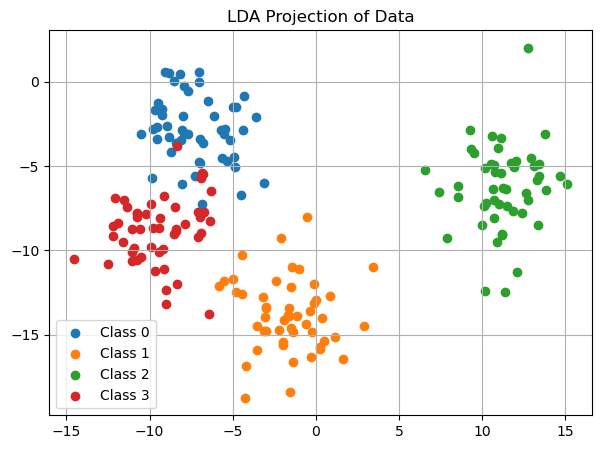

In [86]:
import matplotlib.pyplot as plt
top_eigenvectors = np.array([eigen_pair[1] for eigen_pair in eigen_pairs[:2]])

# Project the data onto the selected LDA dimensions
X_lda = X.dot(top_eigenvectors.T)

# Visualize the reduced data
plt.figure(figsize=(7, 5))


for i in np.unique(y):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=f'Class {i}')

 
plt.legend(loc='best')
plt.title('LDA Projection of Data')
plt.grid()
plt.show()



'''explain quality of the dimensionality reduction'''


In [112]:
import numpy as np

def perceptron_multi(w,x,y):
    num_classes = (len(np.unique(y)))
    weight_matrix = np.zeros((num_classes, x.shape[1]+ 1))  # Initialize weight matrix

    for class_label in range(num_classes):

        # Convert class labels to binary targets (1 for the current class, -1 for others)
        binary_y = np.where(y == class_label, 1, -1)
        
        weight_matrix[class_label] = perceptron_fit(w.copy(), x, binary_y, epochs=1)
    
    return weight_matrix

def step(X):
    return int(1) if X>= 0 else int(-1)

def perceptron_fit(w,X,Y, epochs):
    for epoch in np.arange(0,epochs):
        for i in range(0, len(Y)):
            h = step(np.dot(np.append(1,X[i]), w))
            if h != Y[i]:
                error = float(h-Y[i])
                w = w -error *(np.append(1, X[i]))
    return w

# Initialize weight matrix
num_features = X.shape[1]
num_classes = len(np.unique(y))
initial_weights = np.zeros(num_features+1)

# Train the multi-class perceptron
weight_matrix = perceptron_multi(initial_weights, X, y)

# Print the weight matrix
print("Weight Matrix:")
print(weight_matrix)

Weight Matrix:
[[  6.    60.02  -3.11   9.73  16.93]
 [-68.    17.84  -7.09  12.26  20.27]
 [  0.     8.88  21.06  11.8  -29.67]
 [-26.   -13.72   7.72 -92.98  -6.5 ]]


In [121]:
import numpy as np

def multi_step_function(W, x, y, cl):
    # Check if the input arrays have the same length
    if len(W) != len(x) or len(W) != len(y):
        raise ValueError("Input arrays must have the same length")

    # Create an empty array to store class IDs
    class_ids = []

    # Iterate through each point
    for i in range(len(W)):
        point = (W[i], x[i], y[i])
        
        # Calculate the Euclidean distance from the point to each reference point
        distances = [np.linalg.norm(np.array(point) - np.array(ref_point)) for ref_point in zip(W, x, y)]
        
        # Find the index of the closest reference point
        closest_index = np.argmin(distances)
        
        # Assign the class ID of the closest reference point
        class_id = cl[closest_index]
        class_ids.append(class_id)

    return class_ids




In [139]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
ridge = Ridge()

data = pd.read_csv('Real estate.csv')
split_ratio = 0.75
mean = data.mean()
std = data.std()

# # Standardize the entire dataset (both features and target variable)
data = (data - mean) / std


num_train_samples = int(split_ratio * len(data))

#sluffle the data
dataset = data.values

np.random.shuffle(dataset)
# Split the data into training and testing sets
train_data = dataset[:num_train_samples]
test_data = dataset[num_train_samples:]

X_train = train_data[:, 1:-1]  # Exclude "no" and "y" columns
y_train = train_data[:, -1]

X_test = test_data[:, 1:-1]  # Exclude "no" and "y" columns
y_test = test_data[:, -1]


ridge_model = Ridge()  
ridge_model.fit(X_train, y_train)


Ridge()

In [142]:
import numpy as np
import pandas as pd

def my_ridge(X, y, η, iterations, λ):

    
    # Initialize weights (coefficients) with zeros
    w = np.zeros(X.shape[1])
    
    N = X.shape[0]
    
    for _ in range(iterations):
        # Calculate predictions
        predictions = np.dot(X, w)
        
        # Calculate the gradient of the ridge regression loss with respect to weights
        gradient = -(1/N) * np.dot(X.T, (y - predictions)) + (λ/N) * w
        
        # Update weights using the gradient and learning rate η
        w -= η * gradient
    
    return w

In [148]:
η = 0.1          # Learning rate
iterations = 1000  # Number of iterations
λ = 0       


# Fit the Ridge regression model
weights = my_ridge(X_train, y_train, η, iterations, λ)

# Make predictions on the training data
predictions = np.dot(X_train, weights)

# Calculate Mean Squared Error (MSE)
mse = np.mean((predictions - y_train)**2)

# Print the MSE and weights
print(f"Mean Squared Error: {mse}")
print("Weights (Coefficients):")
print(weights)

Mean Squared Error: 0.43863517294978843
Weights (Coefficients):
[ 0.1  -0.25 -0.42  0.23  0.23 -0.01]
